---
layout: post
title:  "NLP: LSI and LDA"
date:   2023-04-13 10:14:54 +0700
categories: MachineLearning
---
# TOC

# Introduction

Turning words into vector is a good practice in natural language processing. This digitalization enables us to do matrix computation and statistical inference on corpus. One common way to do that is the tf-idf weighting scheme, in which we count the frequency of word appreance in each document (it could be another scheme), resulting in a matrix of row to be word and column to be document. This bag of word approach considers word occurance but doesn't care about the position of words. Still, we can safely assume that if two documents have similar words, they are about similar topic.

## Dot product

After reducing words and documents into vectors in the vector space, we can compute the similarity between words or query (words) and documents. This can be used for information retrieval, to retrieve the documents that are close to the query. How to calculate the similarity exactly? Since they are vector, we can calculate the cosine of the angle between them:

$$ sim(w_1, w_2) = \vec{v}(w_1) . \vec{v}(w_2) = \frac{\vec{V}(w_1).\vec{V}(w_2)}{\mid \vec{V}(w_1) \mid . \mid \vec{V}(w_2) \mid} $$

The numerator is the dot product between two vectors and the denominator is the product of their Euclidean lengths $$ \mid \vec{V}(w_1) \mid = \sqrt{\sum_{i=1}^{m} \vec{V}_{i}^{2}(w)} $$. The denominator is to length-normalize the vectors into the unit vector. 
Consider three documents SaS, PaP, WH to be the three novels: Sense and Sensibility by Jane Austen, Pride and Prejudice by Jane Austen, and Wuthering Heights by Emily Bronte. Consider three terms affection, jealous and gossip with their respective frequency in each of those novels.

|term | SaS | PaP | WH |
|--|--|--|--|
|affection|115|58|20|
|jealous|10|7|11|
|gossip|2|0|6|

The term frequencies are converted into:

|term | SaS | PaP | WH |
|--|--|--|--|
|affection|0.996|0.993|0.847|
|jealous|0.087|0.120|0.466|
|gossip|0.017|0|0.254|

The cosine similarities between SaS and PaP: $$ sim(\vec{v}(SaS), \vec{v}(PaP)) = 0.999 $$ whereas $$ sim(\vec{v}(SaS), \vec{v}(WH)) = 0.888 $$. Thus the two books by Austen are closer to each other than to the book by Bronte (when restricted to the three terms we consider, and when the frequency doesn't have idf multiplier).

If we have the query q = "jealous gossip", its unit vector $$ \vec{v}(q) = (0, 0.707, 0.707) $$ (usually the number of dimensions equals the number of vocabulary M), its similarity index with the three novels would be $$ \vec{v}(q) . \vec{v}(d) $$. With d = Wuthering Heights, the score is 0.509, for d = Price and Prejudge the score is 0.085, and for Sense and Sensibility the score is 0.074. This suggests the novel Wuthering Heights when you query for "jealousy gossip". 

## Singular value decomposition (SVD)

Before doing singular value decomposition, let's recap some linear algebra. Let C be an MxN matrix with real valued entries (for the term-document matrix with all entries non-negative). The rank of the matrix would be the number of linearly independent rows or columns and would be smaller than min M or N. A square matrix with all off diagonal entries to be zero is called a diagonal matrix, the rank equal to the number of non zero diagonal entries. If all the diagonal entries to be 1, it is called the identity matrix I.

For a square matrix MxM called C, we have a vector $$ \vec{x} $$ that is not all zeros and the value $$ \lambda $$ with $$ C \vec{x} = \lambda \vec{x} $$; $$ \lambda $$ being called the eigenvalues of C. The N-vector $$ \vec{x} $$ is called the right eigenvector. The eigenvector corresponding to the biggest eigenvalue woudl be called the principal eigenvector. The left eigenvector of C is the M-vector y such that: $$ \vec{y}^T C = \lambda \vec{y}^T $$. The number of non zero eigenvalues of C is at most rank(C).

We can solve for the eigenvalues of matrix by the characteristic equation:  $$ (C - \lambda I_M) \vec{x} = 0 $$ which is equivalent to: $$ \mid(C - \lambda I_M)\mid = 0 $$ where $$ \mid S \mid $$ denotes the determinant of a square matrix S. This equation of an Mth order polynomial equation with at most M roots which are all eigenvalues of C. We would see that when we do matrix multiplication, the effect is determined by the eigen vectors and eigen values of it. Also, small eigenvalues would have small effect. We would also make use of the fact that, for a symmetric matrix S, the eigenvectors are orthogonal. So matrix decomposition is the ways in which a square matrix is factored into product of matrices derived from its eigenvectors. When we decompose non square matrix (like the term-document matrix), we have singular values, that can parallel the eigen values.

First, consider the theorem for the matrix diagonalization: Let S be a square real valued MxM matrix with M linearly independent eigenvectors. There exists an eigen decomposition: $$ S = U \Sigma U^{-1} $$ where the columns of U are the eigenvectors of S and $$ \Sigma $$ is a diagonal matrix whose diagonal entries are the eigenvalues of S in decreasing order. If the eigenvalues are distint, then this decomposition is unique. Then, for a symmetric matrix, there would be a symmetric diagonal decomposition where the columns of U are orthogonal and normalized eigenvectors of S.

Now we consider our singular value decomposition. Given a term-document matrix C (as above), it is not likely to be square or symmetric. So we consider $$ C.C^T $$ and its term matrix MxM U whose columns are the orthogonal eigenvectors of $$ C.C^T $$. Similarly, we consider its document matrix NxN V whose columns are the orthogonal eigenvectors of $$ C^T.C $$.

Let r be the rank of MxN matrix C, then there is a singular value decomposition of C in the form:

$$ C = U \Sigma V^T $$

$$ \Sigma $$ is the singular matrix with singular values in descending order in the diagonal. Then we can take k biggest singular values and compute the output $$ C_k = U \Sigma_k V^T $$.

This $$ C_k $$ would approximate C, and minimize the Frobenius norm of the matrix difference $$ X = C - C_k $$. The Frobenius distance is:

$$ \mid\mid X \mid\mid_{F} = \sqrt{\sum_{i=1}^{M} \sum_{j=1}^{N} X_{ij}^2} $$

Since $$ C_k $$ has rank k < r, we call $$ C_k $$ a low rank approximation. This is the construct of an approximate version of C, with less dimensions (this can be considered a dimensionality reduction technique). This sometimes gives better information (noise reduction) of the documents.

## Latent semantic indexing (LSI)

The above process is called LSI, when it uses SVD to find a lower rank matrix that can approximate the term document matrix C keeping critical information in the document. This yield a new representation for each document in the corpus and we can cast queries into this representation as well with the query-document similarity score. Furthermore, the LSI can relieve the challenges of mere word-count approach of synonymy and polysemy. Synonymy is the case that multiple words represent similar things, and polysemy is the case that one word can have different meaning. In word-count approach, since we treat each word differently, the computed similarity between a query (car) and a document containing both car and automobile would underestimate the true similarity that a user perceive. In the other case, when a word can mean different thing, a computed similarity basing on word count only would overestimate the true similarity that a user perceive.

In LSI, we can find a latent representation with far lower dimension, when a term document matrix with tens of thousands of rows and columns can be reduced to hundreds. Each row/column (term/document) in the matrix would be mapped to a k-dimensional space, defined by k principal eigenvectors (corresponding to the largest eigenvalues) of $$ C.C^T $$ and $$ C^T.C $$.

After having the new k-dimensional LSI representation, we can compute similarities between vectors. A query vector $$ \vec{q} $$ would be mapped into its LSI represenation by the transformation:

$$ \vec{q_k} = \Sigma_k^{-1} . U_k^T . \vec{q} $$

For example, consider the term-document matrix C

|term|d1|d2|d3|d4|d5|d6|
|--|--|--|--|--|--|--|
|ship|1|0|1|0|0|0|
|boat|0|1|0|0|0|0|
|ocean|1|1|0|0|0|0|
|voyage|1|0|0|1|1|0|
|trip|0|0|0|1|0|1|

The SVD is the product of the following three matrices:

U - the SVD term matrix:

|term|1|2|3|4|5|
|--|--|--|--|--|--|
|ship|-0.44|-0.30|0.57|0.58|0.25|
|boat|-0.13|-0.33|-0.59|0.00|0.73|
|ocean|-0.48|-0.51|-0.37|0.00|-0.61|
|voyage|-0.70|0.35|0.15|-0.58|0.16|
|trip|-0.26|0.65|-0.41|0.58|-0.09|

$$ \Sigma $$ - the SVD singular matrix:

|2.16|0.00|0.00|0.00|0.00|
|--|--|--|--|--|
|0.00|1.59|0.00|0.00|0.00|
|0.00|0.00|1.28|0.00|0.00|
|0.00|0.00|0.00|1.00|0.00|
|0.00|0.00|0.00|0.00|0.39|

$$ V^T $$ - the SVD document matrix:

|d|d1|d2|d3|d4|d5|d6|
|--|--|--|--|--|--|--|
|1|-0.75|-0.28|-0.20|-0.45|-0.33|-0.12|
|2|-0.29|-0.53|-0.19|0.63|0.22|0.41|
|3|0.28|-0.75|0.45|-0.20|0.12|-0.33|
|4|0.00|0.00|0.58|0.00|-0.58|0.58|
|5|-0.53|0.29|0.63|0.19|0.41|-0.22|

We choose the two largest singular value of $$ \Sigma $$ and compute $$ C_2 $$:

|d|d1|d2|d3|d4|d5|d6|
|--|--|--|--|--|--|--|
|1|-1.62|-0.60|-0.44|-0.97|-0.70|-0.26|
|2|-0.46|-0.84|-0.30|1.00|0.35|0.65|
|3|0.00|0.00|0.00|0.00|0.00|0.00|
|4|0.00|0.00|0.00|0.00|0.00|0.00|
|5|0.00|0.00|0.00|0.00|0.00|0.00|

<img width="334" alt="Screen Shot 2023-04-13 at 18 43 10" src="https://user-images.githubusercontent.com/7457301/231749149-5085562e-ab85-4933-86b3-a1c97565feda.png">

Image: the plot of 6 documents, we can see that document 4 is close to document 5, and document 2 is similar to document 3 to some extent.

# Latent Dirichlet Allocation

### Multinomial distribution

The multinomial distribution is a discrete distribution and it is the generalized version of binomial distribution, when we calculate the probability of more than two events. For example, we have 10 balls of 4 blue and 5 red. The multinomial will help to calculate the probability of getting 3 blue and 2 red when we take 5 of 10 for random.

$$ f_p(x) = P(X_1=x_1, X_2=x_2,...,X_k=x_k)= \frac{n!}{x_1! x_2!..x_k!}(p_1^{x_1} p_2^{x_2} ..p_k^{x_k} when \sum_{i=1}^k x_i=n $$ and 0 otherwise.

### Poisson distribution

The Poisson distribution is a discrete probability distribution that is used to model the probability of a given number of events occuring in a fixed interval of time or space, given the average rate at which events occur. It has a single parameter $$ \lambda $$, which is the expected number of events in the interval. The probability of observing exactly k events in the interval is given by the formula:

$$ f(k;\lambda) = P(X=k) = \frac{\lambda^k e^{-\lambda}}{k!} $$

The mean and variance of the Poisson distribution are both $$ \lambda $$.

### beta distribution

The beta distribution is a continuous distribution on the interval [0,1]. Here is the probability density function with parameters $$ \alpha, \beta $$:

$$ f(p;\alpha, \beta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)}p^{\alpha - 1} (1-p)^{\beta - 1} $$ with $$ \Gamma(n) = (n - 1)! $$

![500px-Beta_distribution_pdf svg](https://user-images.githubusercontent.com/7457301/231783869-5e2dc80d-ec74-4ac9-864b-54e6d5f6ff62.png)

Image: The beta distribution takes many shapes depending on the parameters. This gives flexibility in modeling.

## Dirichlet distribution

The Dirichlet distribution is the generalized version of the beta distribution for K categories. Here is the probability density function:

$$ Dir_{\lambda}(\alpha) = f(\lambda; \alpha) = \frac{\Gamma(\sum_{i=1}^{K} \alpha_i)}{\prod_{i=1}^{K} \Gamma(\alpha_i)} \prod_{i=1}^{K} \lambda_{i}^{\alpha_i - 1}(1-\lambda_i)^{\alpha_i - 1} $$

## LDA
LDA is a generative model that maps documents into their respective topics. The topics are not something specific but rather a distribution of words. For example: a latent topic that is modeled by 0.3 Cat * 0.4 Dog * 0.2 Loyal * 0.1 Evil can be called Animal. LDA reduces a lot of dimensionality and hence computation resources. For example, each document has 10 topics, each topics has 500 words. The number of connections connecting documents to topics to words would be less than the number of documents connecting to words. The extreme case is like when each word is a topic.

Mathematically:

- For each document, we choose the length N from the Poisson distribution, which means the probability that N words happen in one document.

- Choose the topics $$ \theta $$ from the Dirichlet distribution, which means the probability for $$ \theta $$ categories.

- Choose the word distribution in each topic according to Dirichlet distribution again, so that each topic is a cluster of words belonging to that topic.

- For each word in a position in a document: choose a topic according to multinomial distribution, choose a word also according to multinomial distribution. 

# Code example
In the following example, we use the library gensim to generate two topics for the documents. The two topics can be named "machine learning" and "computer vision" with coherence score of 0.34.

In [2]:
import gensim
from gensim import corpora

# Example documents
documents = [
    """Machine learning is undoubtedly a significant part of the future of technology. It is a rapidly growing field that has the potential to revolutionize many industries, from healthcare to finance to transportation.
One of the most significant advantages of machine learning is its ability to analyze large amounts of data quickly and accurately. This can help businesses and organizations make better decisions, improve efficiency, and reduce costs. For example, in healthcare, machine learning algorithms can analyze vast amounts of medical data to identify potential health risks and provide personalized treatment recommendations.
Another benefit of machine learning is its ability to automate tasks that would otherwise require human intervention. This can free up time for more important tasks and reduce the risk of errors.
In addition, machine learning can help organizations gain insights into complex systems and phenomena that would be difficult or impossible to analyze manually. For example, machine learning algorithms can be used to analyze patterns in financial data to predict market trends and make more informed investment decisions.
Overall, machine learning has enormous potential to transform the way we work, live, and interact with the world around us. As the technology continues to advance, we can expect to see even more exciting developments in the years to come.""",
    "Natural language processing (NLP) is indeed a complex and rapidly evolving field that involves a wide range of techniques and technologies. At its core, NLP is concerned with teaching computers to understand and interpret human language, and to generate natural-sounding language of their own. This involves tasks such as text classification, sentiment analysis, entity recognition, machine translation, and more. NLP relies on a variety of methods from computer science, linguistics, and statistics, including machine learning, deep learning, neural networks, and probabilistic models. As NLP continues to develop and mature, it is expected to have a significant impact on a wide range of industries, from healthcare and finance to entertainment and education.",
    "Deep learning models are designed to learn patterns and relationships in data, and the more data they have access to, the better they can learn these patterns. Deep learning models often have millions of parameters, which means they need a large amount of data to train effectively. However, there are also techniques like transfer learning and data augmentation that can help mitigate the need for large amounts of data in some cases.",
    """Computer vision is a challenging problem that has captured the attention of researchers and engineers for many years. The ability of computers to interpret and understand visual information has numerous applications, from self-driving cars and image recognition to medical diagnosis and surveillance systems. However, the task of teaching a computer to 'see' and interpret visual data accurately and reliably is far from straightforward.
One of the primary challenges in computer vision is dealing with the enormous amount of data that visual inputs generate. Images and videos are composed of thousands or millions of pixels, each containing color and brightness information. Furthermore, the context in which an object appears can influence how we perceive it. For example, the same object viewed in different lighting conditions or from different angles can appear very different.
Another challenge in computer vision is developing algorithms that can accurately recognize and classify objects in images and videos. This requires a deep understanding of the underlying patterns and features that define objects, as well as the ability to distinguish between objects that appear similar. Additionally, computer vision algorithms must be able to handle variations in size, shape, and orientation of objects in images, as well as changes in lighting, contrast, and background.
Despite these challenges, computer vision research has made significant progress in recent years, driven by advances in deep learning, neural networks, and other machine learning techniques. With continued research and development, the applications of computer vision are likely to expand, leading to improved safety, increased automation, and better decision-making in a wide range of industries.""",
    """Artificial intelligence has numerous applications across various fields, including healthcare, finance, marketing, transportation, and entertainment. Here are some examples:
Healthcare: AI is used for disease detection, drug discovery, medical imaging analysis, personalized treatment planning, and patient monitoring.
Finance: AI helps in fraud detection, investment analysis, risk management, and algorithmic trading.
Marketing: AI is used for customer segmentation, personalized recommendations, sentiment analysis, and chatbots.
Transportation: AI is used for autonomous driving, traffic optimization, and predictive maintenance.
Entertainment: AI is used for content creation, recommendation systems, and audience targeting.
These are just a few examples of how AI is revolutionizing various industries and making our lives easier and more efficient."""
]

# Tokenize the documents and create a dictionary
tokenized_docs = [doc.split() for doc in documents]
dictionary = corpora.Dictionary(tokenized_docs)

# Remove stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
def remove_stopwords(texts):
    return [[word for word in gensim.utils.simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
data_words_nostops = remove_stopwords(tokenized_docs)
data_words_nostops

# Create a corpus from the tokenized documents
corpus = [dictionary.doc2bow(doc) for doc in data_words_nostops]

# Train an LDA model on the corpus
lda_model = gensim.models.ldamodel.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=2,
    passes=10
)

# Print the topics
for topic in lda_model.print_topics():
    print(topic)

(0, '0.027*"learning" + 0.027*"machine" + 0.013*"analyze" + 0.010*"language" + 0.010*"tasks" + 0.010*"significant" + 0.010*"healthcare" + 0.010*"potential" + 0.010*"data" + 0.007*"wide"')
(1, '0.018*"data" + 0.018*"computer" + 0.016*"vision" + 0.013*"learning" + 0.011*"used" + 0.011*"deep" + 0.011*"objects" + 0.008*"patterns" + 0.008*"applications" + 0.008*"different"')


In [3]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.
from gensim.models.coherencemodel import CoherenceModel# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_nostops, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -5.90519129759387

Coherence Score:  0.3773401775166594


In [6]:
import pandas as pd
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data_words_nostops):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_words_nostops)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

/var/folders/kf/5_ggvsz93vxdbx_h0tvy66xh0000gn/T/ipykernel_10095/701034452.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/kf/5_ggvsz93vxdbx_h0tvy66xh0000gn/T/ipykernel_10095/701034452.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0,0.9947,"learning, machine, analyze, language, tasks, s...","[machine, learning, undoubtedly, significant, ..."
1,1,0,0.9872,"learning, machine, analyze, language, tasks, s...","[natural, language, processing, nlp, indeed, c..."
2,2,1,0.9834,"data, computer, vision, learning, used, deep, ...","[deep, learning, models, designed, learn, patt..."
3,3,1,0.9957,"data, computer, vision, learning, used, deep, ...","[computer, vision, challenging, problem, captu..."
4,4,1,0.9873,"data, computer, vision, learning, used, deep, ...","[artificial, intelligence, numerous, applicati..."


In [7]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0,0.9947,"learning, machine, analyze, language, tasks, significant, healthcare, potential, data, wide","[machine, learning, undoubtedly, significant, part, future, technology, rapidly, growing, field,..."
1,1,0.9957,"data, computer, vision, learning, used, deep, objects, patterns, applications, different","[computer, vision, challenging, problem, captured, attention, researchers, engineers, many, year..."


In [13]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 1.0 MB/s eta 0:00:00a 0:00:01


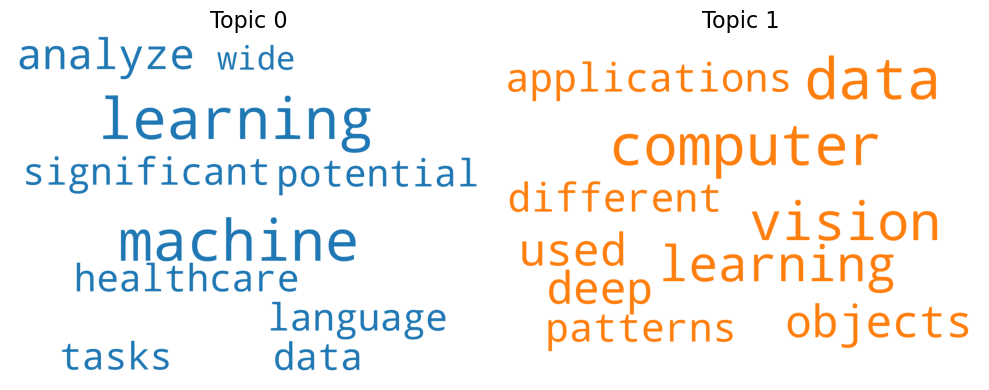

In [23]:
# Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


![21NLP-LSI-LDA_6_0](https://user-images.githubusercontent.com/7457301/232030090-9dcd16ff-96fa-4e5e-9457-3226a240439b.png)


/var/folders/kf/5_ggvsz93vxdbx_h0tvy66xh0000gn/T/ipykernel_10095/3301394421.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
/var/folders/kf/5_ggvsz93vxdbx_h0tvy66xh0000gn/T/ipykernel_10095/3301394421.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


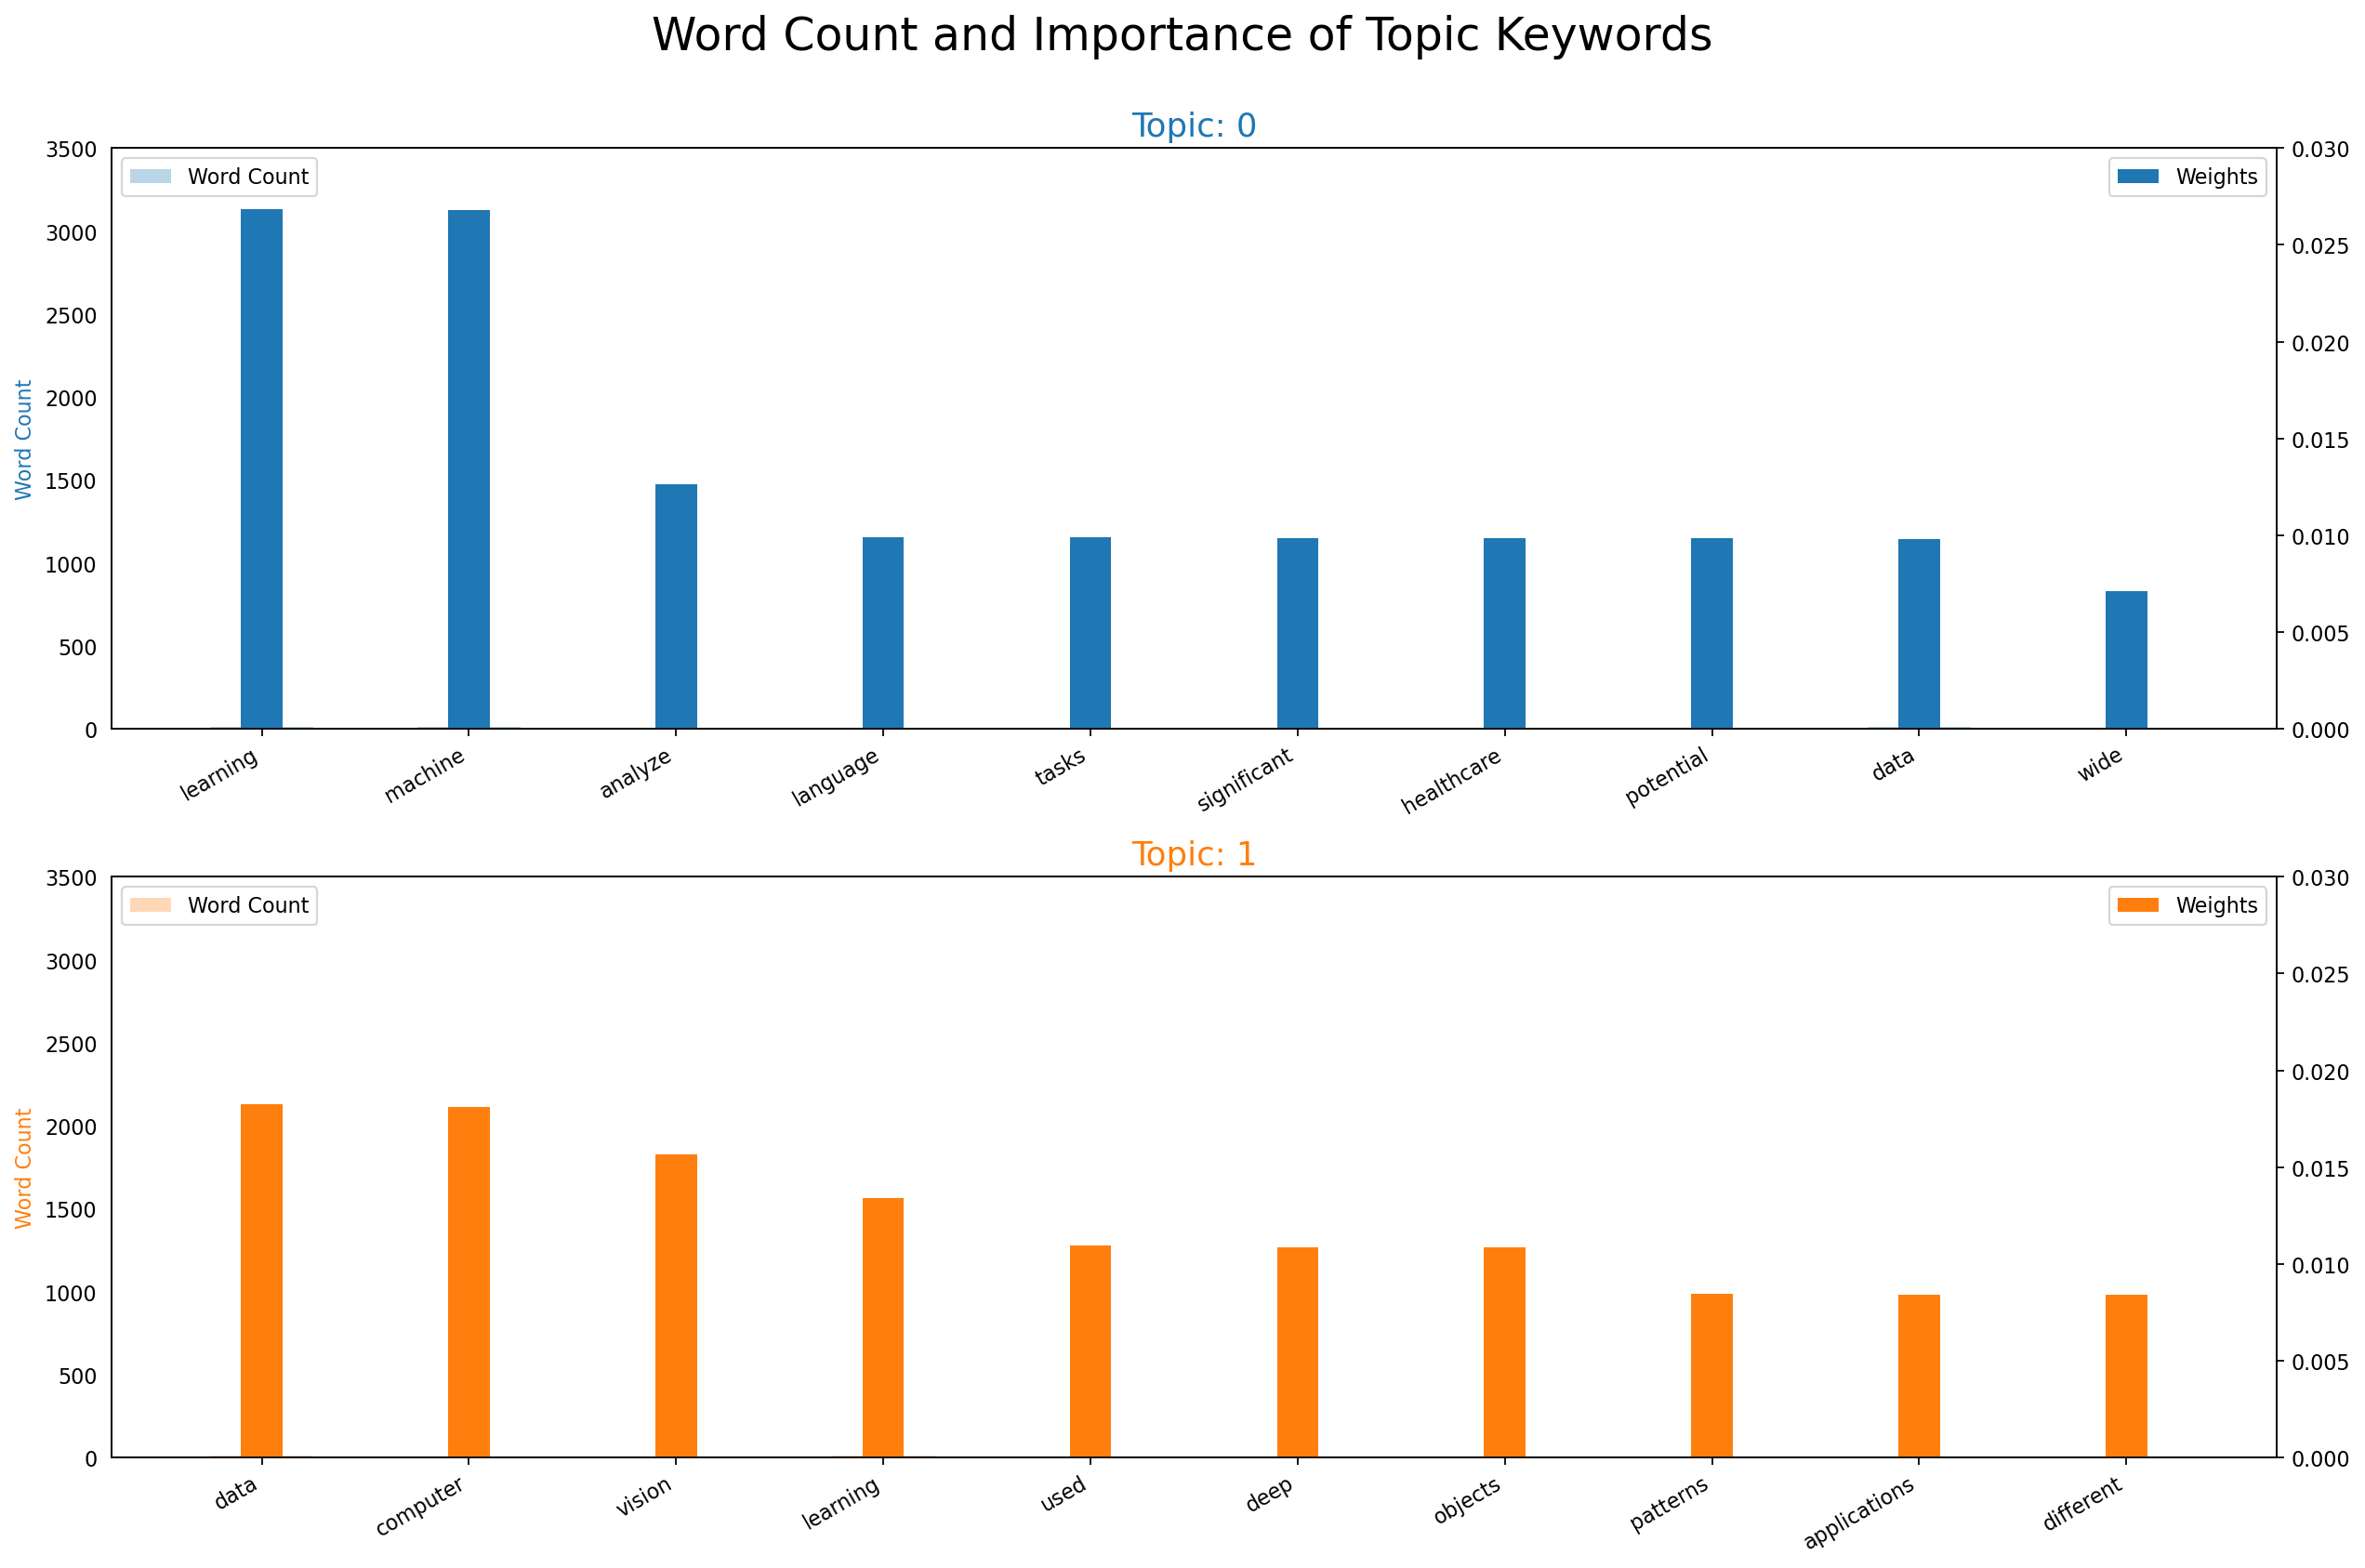

In [25]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_words_nostops for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 1, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

![21NLP-LSI-LDA_7_1](https://user-images.githubusercontent.com/7457301/232030099-94696d70-155f-49b5-8f98-efe20ea8c413.png)